In [2]:
# install.packages(c("tidyverse", "ISLR", "ggpubr"))

In [84]:
library(ISLR)
data("Auto")
data("Carseats")

In [57]:
model <- lm(formula = mpg~horsepower, data=Auto)

In [58]:
options(scipen = 999)

In [59]:
one.way <- aov(mpg~horsepower, data = Auto)
summary(one.way)

             Df Sum Sq Mean Sq F value              Pr(>F)    
horsepower    1  14433   14433   599.7 <0.0000000000000002 ***
Residuals   390   9386      24                                
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [60]:
summary(model)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66 <0.0000000000000002 ***
horsepower  -0.157845   0.006446  -24.49 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 0.00000000000000022


In [61]:
# boxplot(model[['residuals']], main='Boxplot: Residuals', ylab='residual value')

In [63]:
cor(Auto$mpg, Auto$horsepower, method='pearson')

[1] -0.7784268

In [64]:
hp <- data.frame(horsepower = c(98))
mpg_c = predict(model, newdata=hp, interval='confidence')
mpg_c

fit,lwr,upr
24.46708,23.97308,24.96108


In [65]:
mpg_p = predict(model, newdata=hp, interval='prediction')
mpg_p

fit,lwr,upr
24.46708,14.8094,34.12476


# 8a)

i. There is sufficient evidence to suggest a relationship between the predictor and the response. Several of the metrics describe a the strength of the relationship:
    
   - Residuals follow a Gaussian distribution with a median around 0
   - R-squared tells us that roughly 61% of the variance in the dependent variable (response) can be explained by the independent variable (or predictor)
   - The F-Statistic is the output of the one-way anova test which compares variability across groups (Diez et al, 2019). A large F value and low p-value indicates strong enough evidence to reject the null hypothesis that variability between the two groups is due to chance. Instead, we can conclude that mpg is related to changes in horsepower.
    
ii. Again, we can quantify using R-squared which indicates that ~61% of variance in mpg is explained by changes in horsepower

iii. The relationship is negative. MPG worsens with increased horsepower. Specifically, the variables are -78% negatively correlated.

iv. Using a horsepower of 98, mpg is 24.5 miles/gallon. The confidence interval is 23.93 to 24.96 with 95% confidence. The prediction interval is (14.8, 34.1)

# 8b)

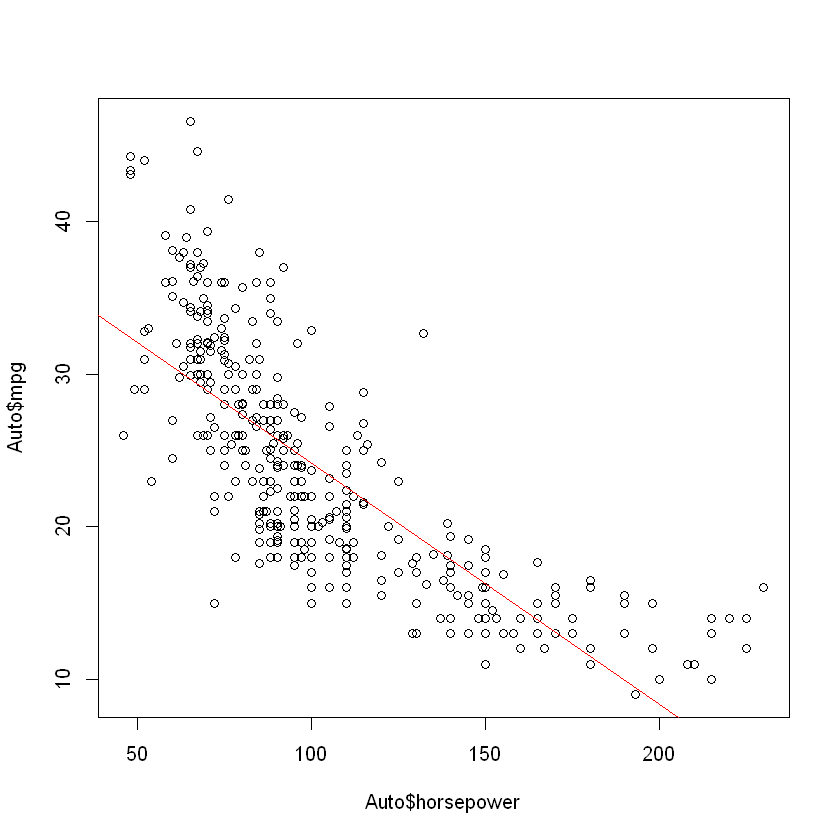

In [81]:
plot(Auto$horsepower, Auto$mpg)                     # Create plot without lines
abline(model, col='red')

In [82]:
?plot

# 8c)

- The parabolic shape of the residuals in plot indicates the relationship may not be exactly linear.
- The distribution in the standardize residual should be normal and follow a straight path, but it deviates in the two quantile extremeties
- The Scale-Location plot approximates the spread of residuals. The spread points are well-spaced and equal. The line should is closer to horizontal. The plot suggests there exists equal variance among residuals (homoscedasticity). 
- Although the points are clustered, they appear to be within Cook's distance (dotted red line) indicating that those points do not necessarily merit removal.

Overall, the first two graphs indicate further analysis is required related to the linearity assumption and the distribution of residuals.

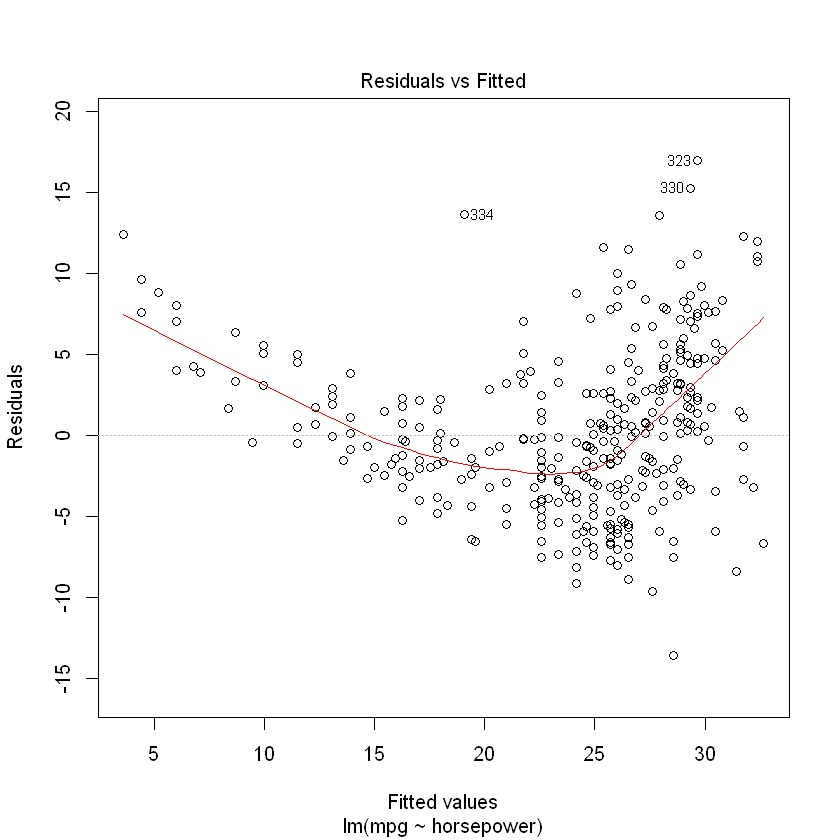

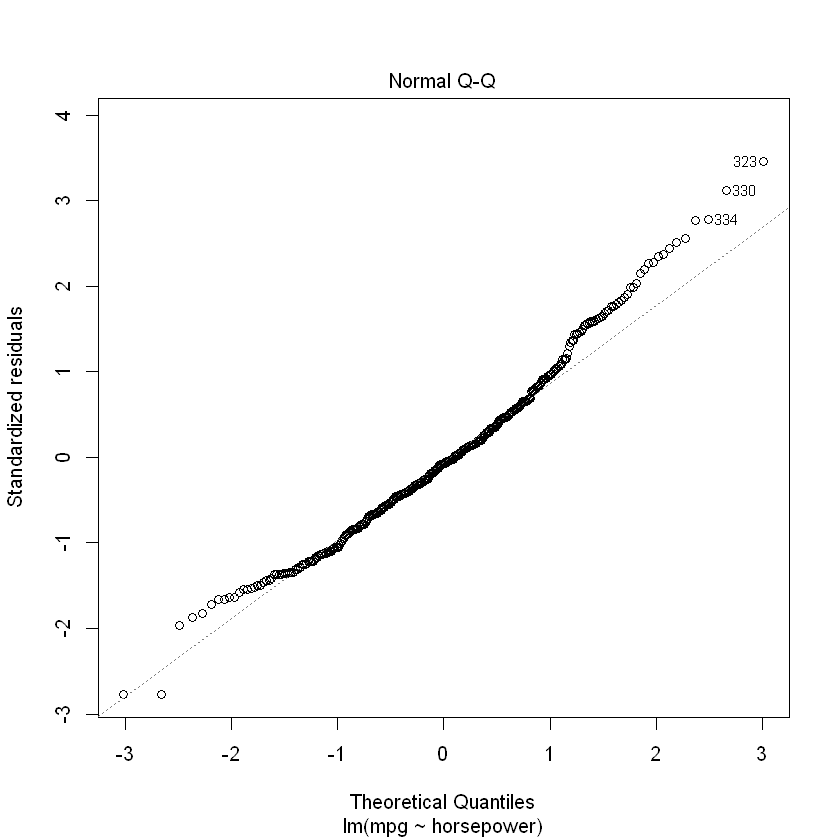

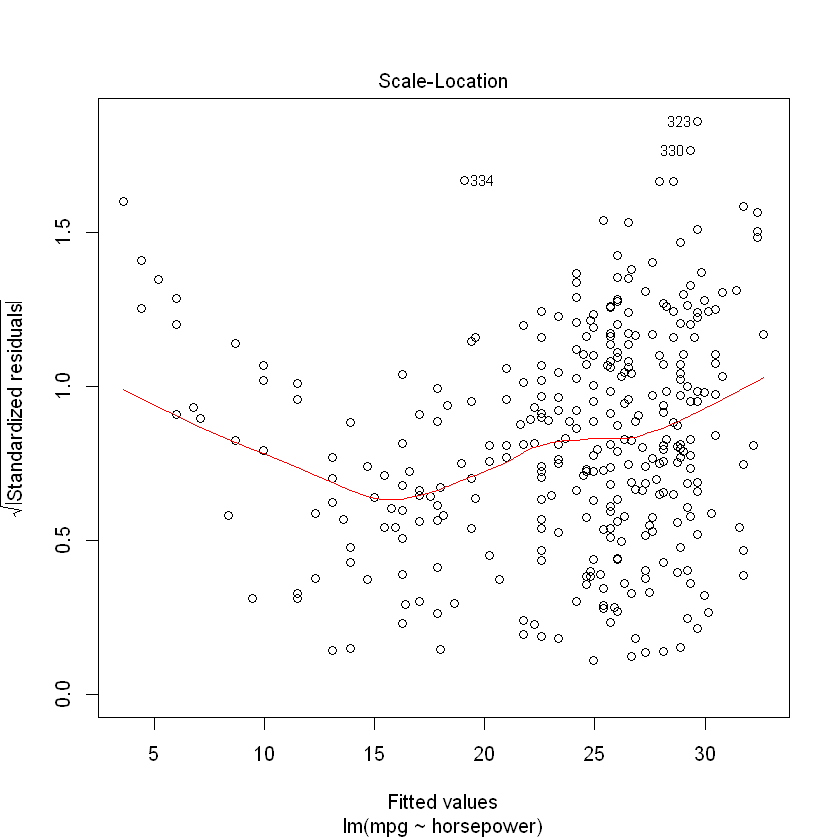

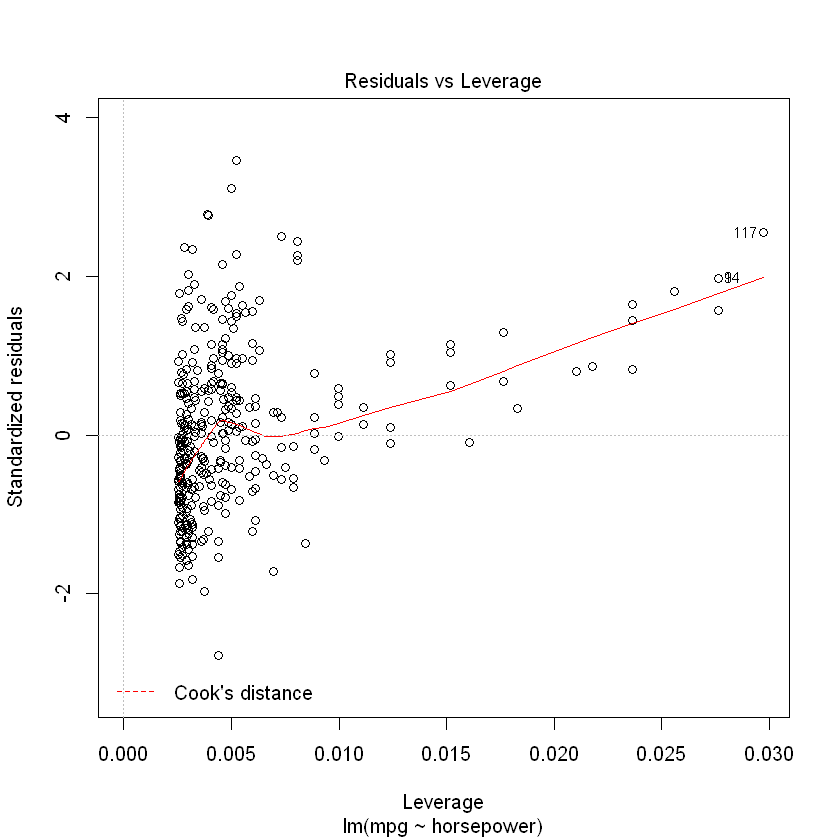

In [62]:
plot(model)

# 10a)

In [94]:
model2 = lm('Sales~Price+Urban+US', data=Carseats)

In [95]:
summary(model2)


Call:
lm(formula = "Sales~Price+Urban+US", data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036 < 0.0000000000000002 ***
Price       -0.054459   0.005242 -10.389 < 0.0000000000000002 ***
UrbanYes    -0.021916   0.271650  -0.081                0.936    
USYes        1.200573   0.259042   4.635           0.00000486 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 0.00000000000000022


# 10b)

- Price: The p-value tells us the coefficent cannot be zero (relationship exists). Price is negatively correlated to Sales.
- UrbanYes: The p-value indicates we cannot reject the null hypothesis that Beta_2=0. There is not a significant relationship.
- USYes: Here we find the attribute is associated and positively correlated

# 10c)

$$A = Price, B = UrbanYes, C = USYes$$
$$Sales = 13.04\ + (-0.05A) \ + (-0.02B) \ + (1.20C)$$ 

# 10d)

As discussed in 10b, we cannot reject the null hypothesis for UrbanYes

# 10e)

In [97]:
model2a = lm('Sales~Price+US', data=Carseats)

In [99]:
summary(model2a)


Call:
lm(formula = "Sales~Price+US", data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652 < 0.0000000000000002 ***
Price       -0.05448    0.00523 -10.416 < 0.0000000000000002 ***
USYes        1.19964    0.25846   4.641           0.00000471 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 0.00000000000000022


# 10f)

Although residual error and R-square are similar for both values. The F-stastic in *e* is slightly higher indicating a more tightly coupled relationship between predictors and Sales. The covariate UrbanYes had very little impact on the model overall. As such, removing it makes the model more parsimonious but does not greatly change performance.

# 10g)

In [102]:
predict(model2a, interval='confidence')

fit,lwr,upr
7.693120,7.389103,7.997137
9.708792,9.248135,10.169450
9.872225,9.387866,10.356585
8.946105,8.581632,9.310578
6.057656,5.625403,6.489909
10.308046,9.757013,10.859079
7.147208,6.735240,7.559177
7.693120,7.389103,7.997137
6.275566,5.855267,6.695866
7.475209,7.164057,7.786362


# 10h)

There is no evidence of outliers or high-leverage observations

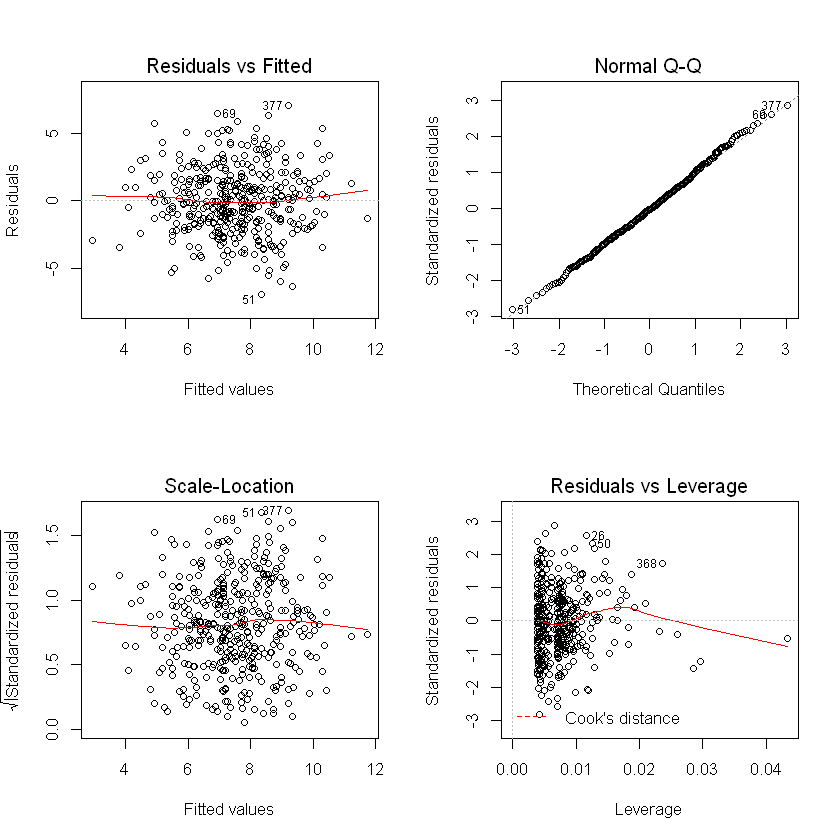

In [146]:
par(mfrow=(c(2,2)))
plot(model2a)

# 14 a)

The coefficients are 2 and 2 and 0.3
$$y = 2 + 2X_1 + 0.3X_2 + \epsilon$$

In [106]:
set.seed(1)
x1=runif(100)
x2=0.5*x1+rnorm(100)/10
y=2+2*x1+0.3*x2+rnorm(100)

# 14b)

In [111]:
cor(x1, x2)

[1] 0.8351212

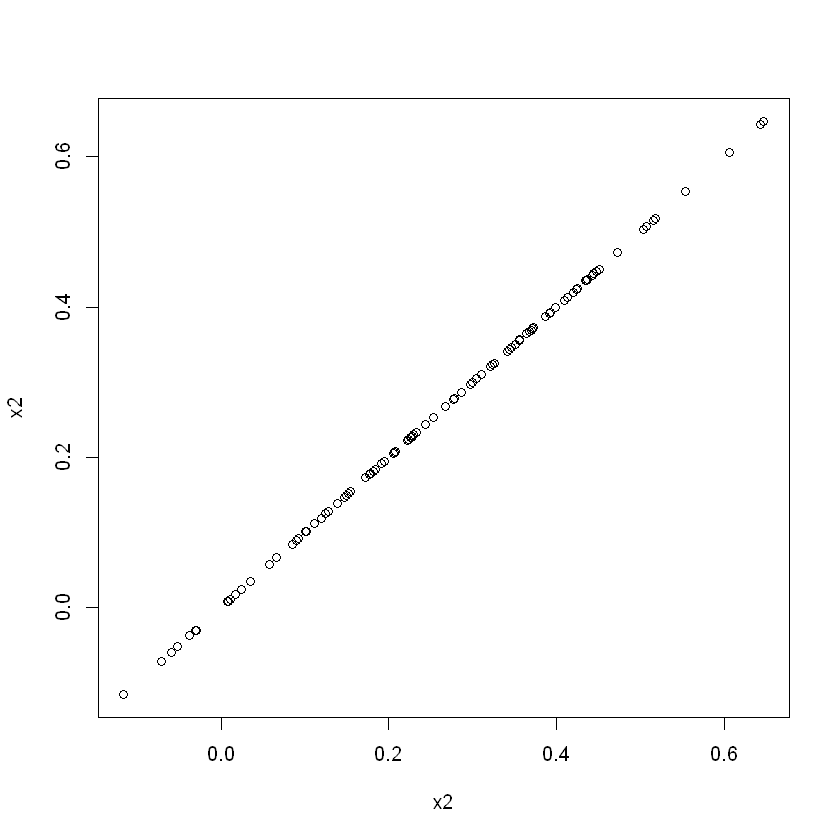

In [114]:
plot(x2,x2)

# 14c)

The coefficients are close to the true values, however we cannot reject the null hypothesis for x2 as its p-value is higher than alpha. 

In [117]:
model14 = lm(y~x1+x2)
summary(model14)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 0.00000000000000761 ***
x1            1.4396     0.7212   1.996              0.0487 *  
x2            1.0097     1.1337   0.891              0.3754    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 0.00001164


# 14d)

Model *d* has an f-statistic which double that of *c* with similar degrees of freedom. Also, the coeficients are now effectively identical to the true values. We can reject the null hypothesis for beta_0 in this case.

In [118]:
model14d = lm(y~x1)
summary(model14d)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 0.00000000000000827 ***
x1            1.9759     0.3963   4.986 0.00000266057947097 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 0.000002661


# 14e)

Using only x2, we can reject the null hypothesis for beta_1=0. Our *e* model performed very similar to *d*.

In [119]:
model14e = lm(y~x2)
summary(model14e)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26 < 0.0000000000000002 ***
x2            2.8996     0.6330    4.58            0.0000137 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 0.00001366


# 14f)

The models behave similarly because x1 and x2 are 84% correlated. The colinearity ambiguates the true effect of the covariates. 

# 14g)

With each model, we find point 101 to be an abnormal. However, it is high-leverage in *c* and *e* but only an outlier in *d*. 

In [120]:
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)

In [121]:
c = lm(y~x1+x2)
d = lm(y~x1)
e = lm(y~x2)

In [125]:
cor(x1, x2)

[1] 0.7392279

In [137]:
summary(c)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 0.000000000000000791 ***
x1            0.5394     0.5922   0.911              0.36458    
x2            2.5146     0.8977   2.801              0.00614 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 0.000005564


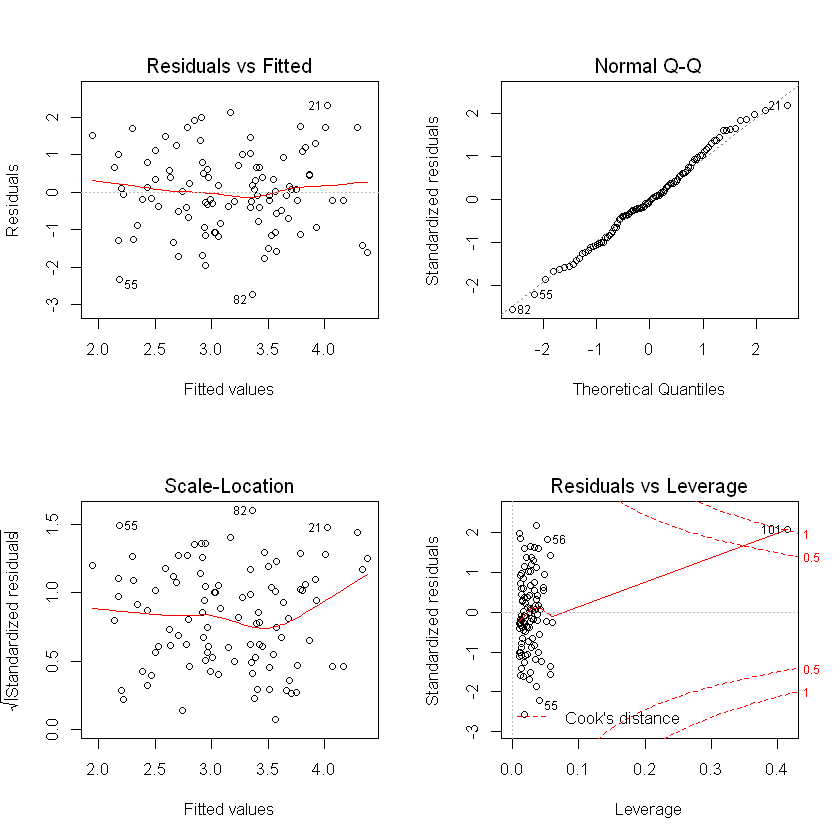

In [134]:
par(mfrow=(c(2,2)))
plot(c)

In [123]:
summary(d)


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 0.00000000000000178 ***
x1            1.7657     0.4124   4.282 0.00004294817303594 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 0.00004295


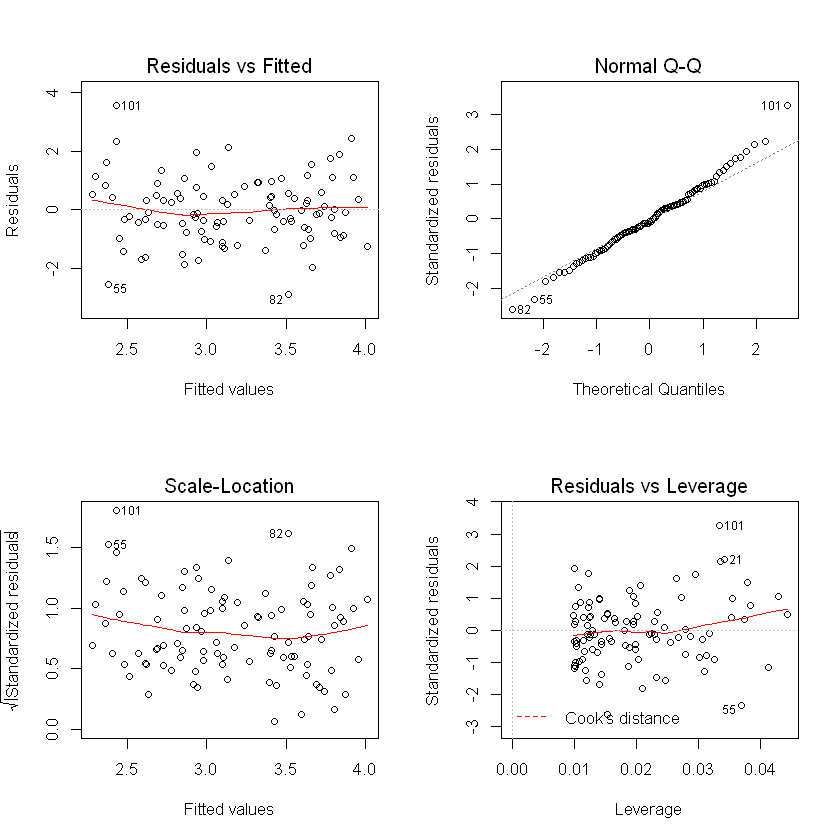

In [135]:
par(mfrow=(c(2,2)))
plot(d)

In [124]:
summary(e)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264 < 0.0000000000000002 ***
x2            3.1190     0.6040   5.164           0.00000125 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 0.000001253


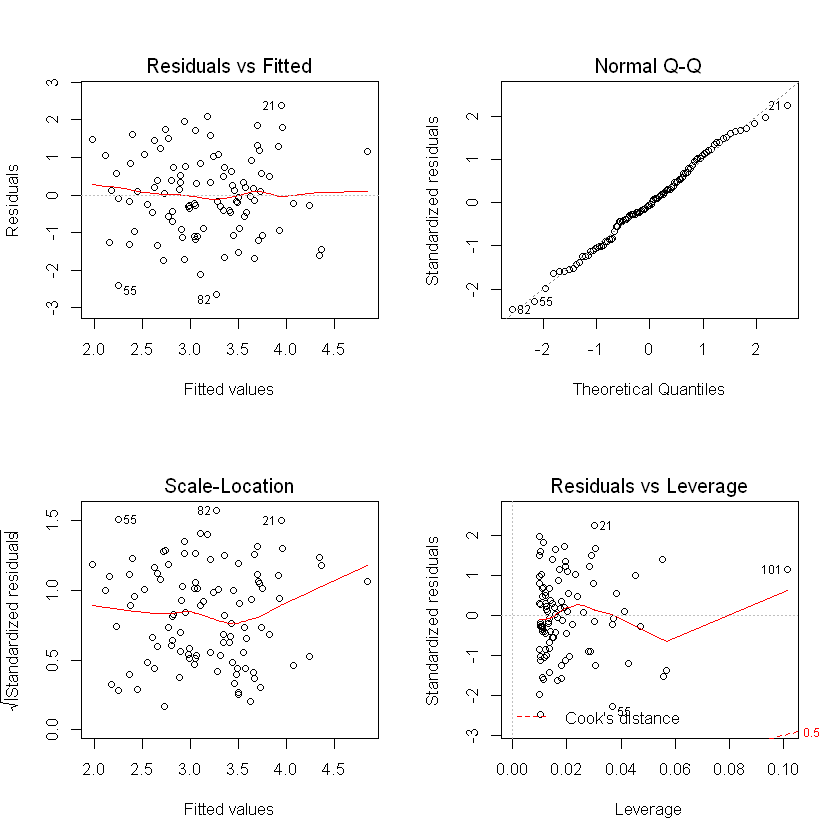

In [136]:
par(mfrow=(c(2,2)))
plot(e)

integer(0)

integer(0)

integer(0)

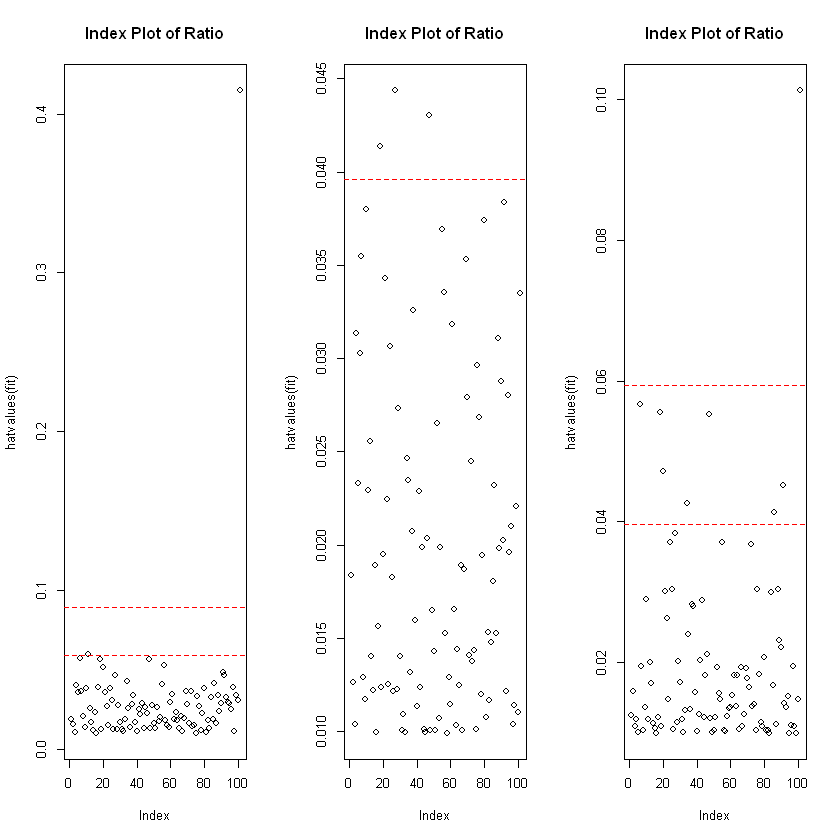

In [145]:
# @credit: https://towardsdatascience.com/how-to-detect-unusual-observations-on-your-regression-model-with-r-de0eaa38bc5b

highleverage <- function(fit) {
 p <- length(coefficients(fit))
 n <- length(fitted(fit))
 ratio <-p/n
 plot(hatvalues(fit), main='Index Plot of Ratio')
 abline(h=c(2,3)*ratio, col='red', lty=2)
 identify(1:n, hatvalues(fit), names(hatvalues(fit)))
}
par(mfrow=(c(1,3)))
highleverage(c)
highleverage(d)
highleverage(e)